                                                LAB ASSIGNMENTS
                                        Module 2: Machine Learning

Support Vector Machine

Apply SVM and perform EDA on pulsar star dataset the data is highly imbalanced and simultaneously do feature scaling and apply SVM using different kernels and different ‘C’ value. For performance metrics use confusion matrix, Accuracy, ROC-AUC curve.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score, auc
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.impute import SimpleImputer




In [2]:
# Loading the dataset 
data = pd.read_csv(r"D:\1_AJINKYA_PAWAR\3_SOFTWARE JOB\1_CDAC\3_AI_Course\Lab_Assignment_Module_2\2_4_5_SVM_90Min\pulsar_data_train.csv\pulsar_data_train.csv")

# Split data into features (X) and target (y)
X = data.drop('target_class', axis=1)
y = data['target_class']

missing_values = y.isnull().sum()
print("Number of missing values in y:", missing_values)

imputer = SimpleImputer(strategy='mean')  # Use an appropriate strategy
X = imputer.fit_transform(X)

Number of missing values in y: 0


Confusion Matrix:
 [[2249   30]
 [  49  178]]
Accuracy: 96.85%
ROC-AUC: 0.96


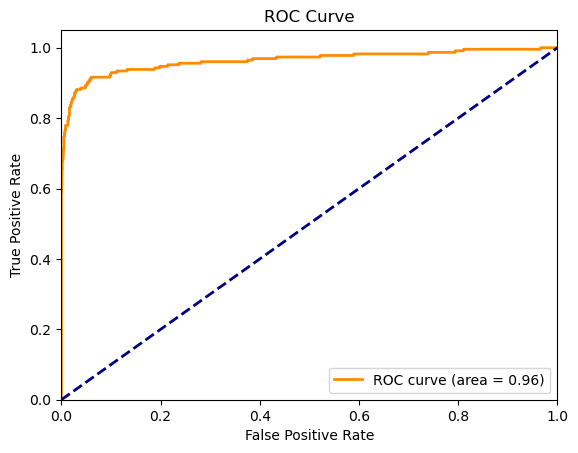

In [3]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# EDA: You can perform exploratory data analysis here if needed

# Perform feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Handling class imbalance using SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define the SVM classifier with different kernels and C values
param_grid = {
    'SVM__kernel': ['linear', 'rbf', 'poly'],
    'SVM__C': [0.1, 1, 10]
}

# Create a pipeline with SMOTE and SVM
pipeline = Pipeline([
    ('SMOTE', smote),
    ('SVM', SVC(probability=True, random_state=42))
])

# Grid search for the best combination of kernel and C value
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Fit the best model on the training data
best_model.fit(X_train_resampled, y_train_resampled)

# Predict on the test data
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Evaluate performance metrics
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Print the results
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("ROC-AUC: {:.2f}".format(roc_auc))

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
